<a href="https://colab.research.google.com/github/chouhandiksha/bigdataproject/blob/colab/notebooks/Extract%20and%20Clean%20LA%20Census%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract and Clean Los Angeles Census Data

**Instructions:**

1. Mount the google drive to access the data by following **Steps to Mount the Drive**.
2. Provide the drive file path to the 2020 source data, 2019 source data, the 2020 target directory, 2019 target directory, and the 5 digit combined FIPS codes in the fourth code cell. 

**Steps to Mount the Drive:**

1. Execute the second code cell.
2. There will be a link to follow in order to authorize the google account for drive. Go to that link.
3. A code to authorize the google account will be generated. Copy the code generated.
4. Go back to the cell where the process of mounting the drive is running. Paste the generated code from step 3 to the text box in the cell and press enter.

In [ ]:
pip install geopandas

In [2]:
import geopandas
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data

# Allow altair to visualize large datasets
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
state_fips = '06' # CA FIPS
county_fips = {'037', '059'}  # 037 Los Angeles County, 059 Orange County
fips = ['06037','06059']

source = Path('drive/MyDrive/big-data-project/data/unprocessed/census/safegraph_open_census_data/')
target = Path('drive/MyDrive/big-data-project/data/clean-data/')

Load file cbg_b01.csv from the SafeGraph Census data. 

The file contains data about population size and statistics related to race. 




| Column Name  | Description     |
| --------- | ------------------------------------------------------------ |
| B01003e1  | TOTAL POPULATION: Total: Total population  -- (Estimate)     |
| B01003m1  | TOTAL POPULATION: Total: Total population -- (Margin of Error) |
| B02001e1  | RACE: Total: Total population -- (Estimate)                  |
| B02001e10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Estimate) |
| B02001e2  | RACE: White alone: Total population -- (Estimate)            |
| B02001e3  | RACE: Black or African American alone: Total population -- (Estimate) |
| B02001e4  | RACE: American Indian and Alaska Native alone: Total population --  (Estimate) |
| B02001e5  | RACE: Asian alone: Total population -- (Estimate)            |
| B02001e6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Estimate) |
| B02001e7  | RACE: Some other race alone: Total population -- (Estimate)  |
| B02001e8  | RACE: Two or more races: Total population -- (Estimate)      |
| B02001e9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Estimate) |
| B02001m1  | RACE: Total: Total population -- (Margin of Error)           |
| B02001m10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Margin of Error) |
| B02001m2  | RACE: White alone: Total population -- (Margin of Error)     |
| B02001m3  | RACE: Black or African American alone: Total population -- (Margin of  Error) |
| B02001m4  | RACE: American Indian and Alaska Native alone: Total population --  (Margin of Error) |
| B02001m5  | RACE: Asian alone: Total population -- (Margin of Error)     |
| B02001m6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Margin of Error) |
| B02001m7  | RACE: Some other race alone: Total population -- (Margin of Error) |
| B02001m8  | RACE: Two or more races: Total population -- (Margin of Error) |
| B02001m9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Margin of Error) |
| B02008e1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Estimate) |
| B02008m1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Margin of Error) |
| B02009e1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Estimate) |
| B02009m1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Margin of Error) |
| B02010e1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Estimate) |
| B02010m1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Margin of Error) |
| B02011e1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Estimate) |
| B02011m1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Margin of Error) |
| B02012e1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Estimate) |
| B02012m1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Margin of Error) |
| B02013e1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Estimate) |
| B02013m1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Margin of Error) |
| B03002e1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Estimate) |
| B03002e10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Estimate) |
| B03002e11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Estimate) |
| B03002e13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Estimate) |
| B03002e14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Estimate) |
| B03002e15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Estimate) |
| B03002e16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Estimate) |
| B03002e17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Estimate) |
| B03002e19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Estimate) |
| B03002e2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Estimate) |
| B03002e20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Estimate) |
| B03002e21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Estimate) |
| B03002e4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Estimate) |
| B03002e5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Estimate) |
| B03002e6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Estimate) |
| B03002e7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Estimate) |
| B03002e9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Estimate) |
| B03002m1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Margin of  Error) |
| B03002m10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Margin of  Error) |
| B03002m11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Margin of Error) |
| B03002m13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Margin of Error) |
| B03002m14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Margin of Error) |
| B03002m15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Margin of Error) |
| B03002m17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Margin of Error) |
| B03002m18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Margin of Error) |
| B03002m19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Margin of Error) |
| B03002m2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Margin of Error) |
| B03002m20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Margin of Error) |
| B03002m21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Margin of Error) |
| B03002m4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Margin of Error) |
| B03002m5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Margin of Error) |
| B03002m7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Margin of  Error) |
| B03002m8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Margin of Error) |
| B03002m9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Margin of Error) |
| B03003e1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Estimate) |
| B03003e2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Estimate) |
| B03003e3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Estimate) |
| B03003m1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Margin of Error) |
| B03003m2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Margin of Error) |
| B03003m3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Margin of Error) |

Load File with total population for our census block groups.

In [5]:
# Read file
df = pd.read_csv(source/'data/cbg_b01.csv', dtype={'census_block_group': object})
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,B01001m5,B01001e6,B01001m6,B01001e7,B01001m7,B01001e8,B01001m8,B01001e9,B01001m9,B01001e10,B01001m10,B01001e11,B01001m11,B01001e12,B01001m12,B01001e13,B01001m13,B01001e14,B01001m14,B01001e15,B01001m15,B01001e16,B01001m16,B01001e17,B01001m17,B01001e18,B01001m18,B01001e19,B01001m19,B01001e20,...,B01002Ce3,B01002Cm3,B01002De1,B01002Dm1,B01002De2,B01002Dm2,B01002De3,B01002Dm3,B01002Ee1,B01002Em1,B01002Ee2,B01002Em2,B01002Ee3,B01002Em3,B01002Fe1,B01002Fm1,B01002Fe2,B01002Fm2,B01002Fe3,B01002Fm3,B01002Ge1,B01002Gm1,B01002Ge2,B01002Gm2,B01002Ge3,B01002Gm3,B01002He1,B01002Hm1,B01002He2,B01002Hm2,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
0,010010201001,745,226,356,121,33,32,46,39,4,8,19,30,0,11,0,11,4,7,29,29,5,8,32,34,23,30,16,14,5,8,46,69,39,31,21,18,24,19,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.4,4.3,33.2,8.0,33.6,5.9,NaN,NaN,NaN,NaN,NaN,NaN,745,226
1,010010201002,1265,232,639,139,3,6,6,9,53,36,59,44,38,39,6,10,17,20,65,55,16,16,27,23,32,28,51,34,40,22,55,40,59,40,32,31,12,13,10,...,NaN,NaN,15.3,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.9,3.5,22.2,4.9,11.7,11.1,44.5,4.1,43.2,7.0,45.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1265,232
2,010010202001,960,261,534,176,0,11,82,71,90,62,24,28,25,23,23,33,0,11,39,48,22,20,8,12,35,36,23,35,9,13,37,38,53,34,3,6,15,17,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.8,33.3,NaN,NaN,NaN,NaN,27.5,25.0,13.0,14.2,37.2,9.2,NaN,NaN,NaN,NaN,NaN,NaN,960,261
3,010010202002,1236,227,634,136,28,21,47,39,33,27,14,31,23,25,20,19,24,23,32,30,54,24,59,32,48,35,70,47,58,35,20,18,45,26,6,9,26,25,4,...,NaN,NaN,28.2,10.6,NaN,NaN,7.9,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3,6.1,NaN,NaN,NaN,NaN,42.1,5.9,33.6,12.3,42.9,2.4,NaN,NaN,NaN,NaN,NaN,NaN,1236,227
4,010010203001,2364,378,1125,229,20,24,166,92,92,72,44,38,35,36,0,11,35,45,7,11,80,67,142,79,54,40,76,53,80,38,91,71,47,27,32,27,10,16,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.2,20.1,27.1,25.7,28.1,15.6,21.3,18.9,21.4,20.4,NaN,NaN,34.5,8.6,33.7,6.4,37.9,9.1,27.2,20.1,27.1,25.7,28.1,15.6,2364,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,460,171,43,65,0,13,0,13,0,13,0,13,0,13,8,12,88,80,0,13,14,20,11,17,14,23,0,13,0,13,116,109,65,99,38,60,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,3.3,NaN,NaN,68.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.5,33.1,58.8,10.1,37.3,29.6,921,332
220329,721537506012,2703,531,1353,352,142,112,62,63,62,76,46,53,28,43,77,65,58,60,180,82,59,62,124,108,60,50,74,52,43,49,50,43,180,138,0,13,10,16,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.5,3.5,20.0,6.4,25.9,23.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.2,7.7,25.4,12.6,38.6,7.6,2703,531
220330,721537506013,1195,425,583,222,0,13,67,75,103,116,56,50,28,23,15,23,0,13,48,47,84,95,0,13,14,17,30,30,23,27,9,14,34,40,10,16,32,50,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.9,4.0,22.4,6.6,40.5,22.8,1195,425
220331,721537506021,2005,471,926,251,68,49,54,40,107,82,0,13,0,13,0,13,35,54,0,13,75,72,78,62,47,47,7,11,56,87,100,71,54,36,43,37,27,31,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.2,23.0,50.7,36.5,51.4,27.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.3,8.1,39.4,15.2,50.3,7.7,2005,471


Extract all census block groups needed.

In [6]:
# Function to filter out FIPS
def filter_fips(df, fips=fips):
    return df[df['census_block_group'].astype(str).str[:5].isin(fips)]

In [7]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,B01001m5,B01001e6,B01001m6,B01001e7,B01001m7,B01001e8,B01001m8,B01001e9,B01001m9,B01001e10,B01001m10,B01001e11,B01001m11,B01001e12,B01001m12,B01001e13,B01001m13,B01001e14,B01001m14,B01001e15,B01001m15,B01001e16,B01001m16,B01001e17,B01001m17,B01001e18,B01001m18,B01001e19,B01001m19,B01001e20,...,B01002Ce3,B01002Cm3,B01002De1,B01002Dm1,B01002De2,B01002Dm2,B01002De3,B01002Dm3,B01002Ee1,B01002Em1,B01002Ee2,B01002Em2,B01002Ee3,B01002Em3,B01002Fe1,B01002Fm1,B01002Fe2,B01002Fm2,B01002Fe3,B01002Fm3,B01002Ge1,B01002Gm1,B01002Ge2,B01002Gm2,B01002Ge3,B01002Gm3,B01002He1,B01002Hm1,B01002He2,B01002Hm2,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
13843,060371011101,1785,433,906,210,84,71,47,45,61,47,34,35,19,31,0,12,0,12,32,36,30,37,72,56,46,39,125,71,44,32,117,61,75,61,0,12,27,24,8,...,NaN,NaN,54.9,15.7,62.3,19.1,54.6,24.7,NaN,NaN,NaN,NaN,NaN,NaN,31.7,27.1,43.1,33.1,18.8,44.7,4.1,15.5,NaN,NaN,NaN,NaN,39.8,6.4,41.5,5.5,37.8,9.2,43.2,18.5,43.4,21.4,40.8,33.7,1785,433
13844,060371011102,1770,370,805,166,7,11,54,43,119,69,58,49,11,16,0,12,0,12,31,38,68,62,79,43,41,38,42,31,42,41,55,38,61,36,10,15,3,6,31,...,NaN,NaN,66.2,19.5,41.9,48.1,67.5,5.8,NaN,NaN,NaN,NaN,NaN,NaN,24.8,6.6,29.0,5.8,24.3,4.0,54.0,48.6,33.4,24.1,NaN,NaN,46.9,12.8,52.3,13.2,43.8,11.9,24.4,4.8,24.7,8.0,24.4,5.8,1770,370
13845,060371011103,1112,282,563,168,41,49,8,14,30,36,0,12,6,10,11,18,0,12,45,34,73,50,15,19,95,65,0,12,28,26,65,59,72,51,0,12,26,32,10,...,NaN,NaN,28.9,0.2,28.7,0.8,48.4,38.2,NaN,NaN,NaN,NaN,NaN,NaN,47.0,3.8,49.6,8.8,21.9,21.3,NaN,NaN,NaN,NaN,NaN,NaN,50.9,18.7,44.0,17.8,52.9,17.4,35.5,4.1,35.5,7.6,34.5,15.4,1112,282
13846,060371011221,2169,380,1100,187,37,35,22,37,45,35,13,20,19,21,0,12,13,21,34,32,124,70,94,66,50,41,39,35,62,64,108,69,132,59,30,27,105,59,7,...,NaN,NaN,61.4,6.0,61.8,4.5,61.0,23.3,NaN,NaN,NaN,NaN,NaN,NaN,41.8,14.9,48.5,12.1,24.6,30.7,38.5,18.8,NaN,NaN,38.6,27.1,50.6,8.0,48.3,10.9,52.8,7.4,40.4,7.1,48.3,16.4,33.4,19.4,2169,380
13847,060371011222,1132,272,506,173,0,12,34,40,12,21,0,12,0,12,0,12,0,12,16,25,26,42,103,117,19,27,14,22,0,12,107,58,58,42,19,20,39,28,9,...,NaN,NaN,50.8,3.8,50.9,10.4,50.6,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.1,5.3,44.0,23.5,52.4,1.9,37.5,17.4,45.0,23.3,21.5,40.9,1132,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23024,060591106071,789,260,437,173,0,12,0,12,23,32,42,44,0,12,11,17,35,48,17,19,30,29,40,39,18,24,37,50,44,45,8,14,49,44,0,12,21,23,6,...,NaN,NaN,44.0,11.0,38.8,12.9,51.0,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.4,14.9,28.8,11.0,NaN,NaN,66.5,11.5,49.0,47.2,70.1,11.3,32.1,21.6,22.1,9.8,34.4,35.1,789,260
23025,060591106072,1700,386,854,225,107,65,25,38,70,44,27,28,39,34,21,28,0,12,83,52,70,48,0,12,22,23,93,60,91,59,40,43,100,78,0,12,10,15,35,...,28.9,46.7,36.8,5.5,40.5,6.7,36.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,11.6,40.0,5.7,2.4,38.3,41.2,NaN,NaN,NaN,NaN,NaN,NaN,41.9,16.1,40.8,27.8,48.3,39.7,24.5,2.8,24.2,6.6,38.1,19.1,1700,386
23026,060591106073,1744,289,777,161,96,71,41,26,43,38,6,11,0,12,0,12,0,12,8,12,75,57,64,60,146,73,57,48,86,43,23,26,10,17,10,15,8,12,54,...,NaN,NaN,32.8,3.5,35.2,6.0,32.5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.9,33.8,NaN,NaN,27.4,37.9,9.9,81.0,NaN,NaN,9.4,64.6,46.4,2.7,48.4,7.1,40.9,12.1,38.1,20.5,37.9,26.3,38.2,21.2,1744,289
23027,060599800001,25,14,15,19,0,12,0,12,0,12,0,12,15,19,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,14


In [8]:
'We have {} Census Block Groups'.format(len(df.index))

'We have 8248 Census Block Groups'

Extract the total population for each census block group, which is under column B01003e1.

In [9]:
# Select column
df = df[['census_block_group','B01003e1']]
df = df.rename(columns={'census_block_group':'cbg', 'B01003e1':'pop_total'})
df = df.set_index('cbg')
df = df
df

,pop_total
cbg,
060371011101,1785
060371011102,1770
060371011103,1112
060371011221,2169
060371011222,1132
...,...
060591106071,789
060591106072,1700
060591106073,1744


In [10]:
alt.Chart(df, title='Los Angeles CBG Population Histogram').mark_bar().encode(
    x=alt.X('pop_total:Q', bin=alt.Bin(maxbins=20), title='Total CBG Population'),
    y="count()"
).interactive()

alt.Chart(...)

![la-pop-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/la-pop-hist.png)

Load the file with the race stats

In [11]:
# Read file
df = pd.read_csv(source/'data/cbg_b02.csv', dtype={'census_block_group': object})
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,B02001m5,B02001e6,B02001m6,B02001e7,B02001m7,B02001e8,B02001m8,B02001e9,B02001m9,B02001e10,B02001m10,B02008e1,B02008m1,B02009e1,B02009m1,B02010e1,B02010m1,B02011e1,B02011m1,B02012e1,B02012m1,B02013e1,B02013m1,C02003e1,C02003m1,C02003e2,C02003m2,C02003e3,C02003m3,C02003e4,C02003m4,C02003e5,C02003m5,C02003e6,C02003m6,C02003e7,C02003m7,C02003e8,C02003m8,C02003e9,C02003m9,C02003e10,C02003m10,C02003e11,C02003m11,C02003e12,C02003m12,C02003e13,C02003m13,C02003e14,C02003m14,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
0,010010201001,745,226,585,198,160,140,0,11,0,11,0,11,0,11,0,11,0,11,0,11,585,198,160,140,0,11,0,11,0,11,0,11,745,226,745,226,585,198,160,140,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11
1,010010201002,1265,232,1083,222,104,75,0,11,9,13,0,11,0,11,69,46,0,11,69,46,1152,221,138,98,6,10,17,21,21,33,0,11,1265,232,1196,229,1083,222,104,75,0,11,9,13,0,11,0,11,69,46,0,11,69,46,69,46,34,44,6,10,8,14,0,11,21,33,0,11,0,11
2,010010202001,960,261,361,179,568,195,0,11,0,11,13,20,0,11,18,30,0,11,18,30,379,180,568,195,0,11,18,30,13,20,0,11,960,261,942,261,361,179,568,195,0,11,0,11,13,20,0,11,18,30,0,11,18,30,18,30,0,11,0,11,18,30,0,11,0,11,0,11,0,11
3,010010202002,1236,227,615,154,571,168,0,11,24,36,0,11,10,12,16,24,0,11,16,24,631,153,575,168,12,23,24,36,0,11,10,12,1236,227,1220,227,615,154,571,168,0,11,24,36,0,11,10,12,16,24,0,11,16,24,16,24,4,7,12,23,0,11,0,11,0,11,0,11,0,11
4,010010203001,2364,378,1481,314,515,197,22,34,27,32,6,14,228,285,85,103,0,11,85,103,1566,316,515,197,46,56,32,38,62,108,228,285,2364,378,2279,396,1481,314,515,197,22,34,27,32,6,14,228,285,85,103,0,11,85,103,85,103,0,11,24,30,5,10,0,11,56,95,0,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,752,348,0,13,0,13,0,13,0,13,82,60,87,130,0,13,87,130,839,329,87,130,0,13,0,13,0,13,82,60,921,332,834,353,752,348,0,13,0,13,0,13,0,13,82,60,87,130,0,13,87,130,87,130,87,130,0,13,0,13,0,13,0,13,0,13,0,13
220329,721537506012,2703,531,2230,459,207,175,40,63,0,13,0,13,200,192,26,39,26,39,0,13,2230,459,233,180,40,63,0,13,0,13,226,189,2703,531,2677,535,2230,459,207,175,40,63,0,13,0,13,200,192,26,39,26,39,0,13,26,39,0,13,0,13,0,13,0,13,26,39,0,13,0,13
220330,721537506013,1195,425,1085,429,25,31,0,13,0,13,0,13,42,67,43,67,0,13,43,67,1128,437,68,75,0,13,0,13,0,13,42,67,1195,425,1152,417,1085,429,25,31,0,13,0,13,0,13,42,67,43,67,0,13,43,67,43,67,43,67,0,13,0,13,0,13,0,13,0,13,0,13
220331,721537506021,2005,471,1662,463,68,64,0,13,0,13,0,13,266,202,9,16,0,13,9,16,1671,462,77,69,0,13,0,13,0,13,266,202,2005,471,1996,472,1662,463,68,64,0,13,0,13,0,13,266,202,9,16,0,13,9,16,9,16,9,16,0,13,0,13,0,13,0,13,0,13,0,13


In [12]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,B02001m5,B02001e6,B02001m6,B02001e7,B02001m7,B02001e8,B02001m8,B02001e9,B02001m9,B02001e10,B02001m10,B02008e1,B02008m1,B02009e1,B02009m1,B02010e1,B02010m1,B02011e1,B02011m1,B02012e1,B02012m1,B02013e1,B02013m1,C02003e1,C02003m1,C02003e2,C02003m2,C02003e3,C02003m3,C02003e4,C02003m4,C02003e5,C02003m5,C02003e6,C02003m6,C02003e7,C02003m7,C02003e8,C02003m8,C02003e9,C02003m9,C02003e10,C02003m10,C02003e11,C02003m11,C02003e12,C02003m12,C02003e13,C02003m13,C02003e14,C02003m14,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
13843,060371011101,1785,433,1473,392,7,13,0,12,51,38,0,12,195,178,59,88,0,12,59,88,1524,409,58,88,0,12,59,40,8,14,195,178,1785,433,1726,417,1473,392,7,13,0,12,51,38,0,12,195,178,59,88,0,12,59,88,59,88,51,86,0,12,0,12,0,12,8,14,0,12,0,12
13844,060371011102,1770,370,975,254,39,41,0,12,120,91,3,6,582,327,51,39,9,15,42,35,1026,257,39,41,15,22,147,95,3,6,591,327,1770,370,1719,372,975,254,39,41,0,12,120,91,3,6,582,327,51,39,9,15,42,35,51,39,0,12,15,22,27,27,0,12,9,15,0,12,0,12
13845,060371011103,1112,282,896,251,8,13,0,12,136,125,0,12,72,71,0,12,0,12,0,12,896,251,8,13,0,12,136,125,0,12,72,71,1112,282,1112,282,896,251,8,13,0,12,136,125,0,12,72,71,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12
13846,060371011221,2169,380,1746,305,0,12,18,22,154,106,0,12,171,170,80,81,43,64,37,52,1785,310,12,18,84,84,154,106,0,12,214,180,2169,380,2089,365,1746,305,0,12,18,22,154,106,0,12,171,170,80,81,43,64,37,52,80,81,12,18,25,49,0,12,0,12,43,64,0,12,0,12
13847,060371011222,1132,272,938,263,0,12,0,12,169,101,0,12,9,15,16,25,0,12,16,25,954,268,0,12,16,25,169,101,0,12,9,15,1132,272,1116,267,938,263,0,12,0,12,169,101,0,12,9,15,16,25,0,12,16,25,16,25,0,12,16,25,0,12,0,12,0,12,0,12,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23024,060591106071,789,260,512,230,17,20,13,19,200,135,0,12,0,12,47,54,0,12,47,54,532,233,44,60,13,19,247,143,0,12,0,12,789,260,742,246,512,230,17,20,13,19,200,135,0,12,0,12,47,54,0,12,47,54,47,54,0,12,0,12,20,32,0,12,27,44,0,12,0,12
23025,060591106072,1700,386,721,271,0,12,62,64,837,312,0,12,64,125,16,27,16,27,0,12,737,269,0,12,62,64,837,312,0,12,80,128,1700,386,1684,388,721,271,0,12,62,64,837,312,0,12,64,125,16,27,16,27,0,12,16,27,0,12,0,12,0,12,0,12,16,27,0,12,0,12
23026,060591106073,1744,289,673,211,24,39,10,16,978,299,0,12,31,41,28,30,6,10,22,29,695,212,24,39,16,18,1000,296,0,12,37,43,1744,289,1716,291,673,211,24,39,10,16,978,299,0,12,31,41,28,30,6,10,22,29,28,30,0,12,0,12,22,29,0,12,6,10,0,12,0,12
23027,060599800001,25,14,18,16,0,12,0,12,7,13,0,12,0,12,0,12,0,12,0,12,18,16,0,12,0,12,7,13,0,12,0,12,25,14,25,14,18,16,0,12,0,12,7,13,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12


In [13]:
# Get white only population
df = df[['census_block_group','B02001e1','B02001e2']]
df = df.rename(columns={'census_block_group':'cbg','B02001e1':'pop_total','B02001e2':'pop_whiteonly' })
df = df.set_index('cbg')
df

,pop_total,pop_whiteonly
cbg,,
060371011101,1785,1473
060371011102,1770,975
060371011103,1112,896
060371011221,2169,1746
060371011222,1132,938
...,...,...
060591106071,789,512
060591106072,1700,721
060591106073,1744,673


In [14]:
# Calculate percentage
df['perc_whiteonly']= df.apply(lambda row: row['pop_whiteonly']/row['pop_total']*100 if row['pop_total']!=0 else 0, axis=1)
df

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
060371011101,1785,1473,82.521008
060371011102,1770,975,55.084746
060371011103,1112,896,80.575540
060371011221,2169,1746,80.497925
060371011222,1132,938,82.862191
...,...,...,...
060591106071,789,512,64.892269
060591106072,1700,721,42.411765
060591106073,1744,673,38.589450


In [15]:
# Get top 3 CBG with highest whiteonly percentage
df.nlargest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
060371239012,404,404,100.0
060371374022,1685,1685,100.0
060371390013,587,587,100.0


In [16]:
# Get top 3 CBG with lowest whiteonly percentage
df.nsmallest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
060372325004,728,0,0.0
060372343002,1002,0,0.0
060372380002,452,0,0.0


In [17]:
# unique variable for join later
race_df = df 
race_df

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
060371011101,1785,1473,82.521008
060371011102,1770,975,55.084746
060371011103,1112,896,80.575540
060371011221,2169,1746,80.497925
060371011222,1132,938,82.862191
...,...,...,...
060591106071,789,512,64.892269
060591106072,1700,721,42.411765
060591106073,1744,673,38.589450


In [18]:
alt.Chart(race_df, title='Los Angeles CBG Percentage White Only Histogram').mark_bar().encode(
    x=alt.X('perc_whiteonly:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage White Only'),
    y="count()"
).interactive()

alt.Chart(...)

![la-wh-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/la-wh-hist.png)

# Get Poverty Stats


| Column Name | Description |
| -------- | ------------------------------------------------------------ |
| C17002e1 | RATIO OF INCOME TO POVERTY LEVEL IN THE  PAST 12 MONTHS: Total: Population for whom poverty status is determined --  (Estimate) |
| C17002e2 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: Under .50:  Population for whom poverty status is determined -- (Estimate) |
| C17002e3 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: .50 to .99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e4 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.00 to 1.24:  Population for whom poverty status is determined -- (Estimate) |
| C17002e5 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.25 to 1.49:  Population for whom poverty status is determined -- (Estimate) |
| C17002e6 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.50 to 1.84:  Population for whom poverty status is determined -- (Estimate) |
| C17002e7 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.85 to 1.99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e8 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 2.00 and over:  Population for whom poverty status is determined -- (Estimate) |






In [19]:
# Read file 
df = pd.read_csv(source/'data/cbg_c17.csv', dtype={'census_block_group': object})
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,C17002m5,C17002e6,C17002m6,C17002e7,C17002m7,C17002e8,C17002m8,B17010e1,B17010m1,B17010e2,B17010m2,B17010e3,B17010m3,B17010e4,B17010m4,B17010e5,B17010m5,B17010e6,B17010m6,B17010e7,B17010m7,B17010e8,B17010m8,B17010e9,B17010m9,B17010e10,B17010m10,B17010e11,B17010m11,B17010e12,...,B17021e16,B17021m16,B17021e17,B17021m17,B17021e18,B17021m18,B17021e19,B17021m19,B17021e20,B17021m20,B17021e21,B17021m21,B17021e22,B17021m22,B17021e23,B17021m23,B17021e24,B17021m24,B17021e25,B17021m25,B17021e26,B17021m26,B17021e27,B17021m27,B17021e28,B17021m28,B17021e29,B17021m29,B17021e30,B17021m30,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
0,010010201001,745,226,47,58,96,93,49,36,76,105,30,30,6,9,441,207,193,58,29,30,7,10,0,11,0,11,0,11,0,11,7,10,22,28,0,11,0,11,0,...,7,11,18,21,50,69,602,222,514,234,383,201,383,201,0,11,131,115,22,22,22,22,0,11,109,113,109,113,0,11,88,42,66,37,56,35,10,12,22,27
1,010010201002,1265,232,8,10,48,76,31,50,29,43,96,98,9,16,1044,227,390,69,15,24,0,11,0,11,0,11,0,11,0,11,0,11,15,24,0,11,0,11,0,...,8,10,0,11,0,11,1209,239,1145,245,921,242,921,242,0,11,224,155,33,49,33,49,0,11,191,145,191,145,0,11,64,36,58,32,50,30,8,11,6,9
2,010010202001,955,259,122,155,243,118,20,19,16,18,24,34,14,24,516,195,244,72,85,50,21,30,21,30,0,11,0,11,21,30,0,11,64,44,3,6,0,11,0,...,71,40,9,12,0,11,590,204,518,206,428,188,428,188,0,11,90,70,13,26,13,26,0,11,77,67,77,67,0,11,72,38,62,33,62,33,0,11,10,14
3,010010202002,1059,214,53,47,65,68,61,50,87,71,58,71,75,104,660,189,286,90,22,25,0,11,0,11,0,11,0,11,0,11,0,11,22,25,0,11,0,11,0,...,21,22,7,10,10,14,941,209,796,222,523,196,523,196,0,11,273,110,32,53,32,53,0,11,241,99,234,93,7,12,145,51,138,50,132,51,6,9,7,10
4,010010203001,2364,378,23,32,77,75,74,86,117,108,61,52,468,325,1544,337,560,92,17,20,11,16,0,11,0,11,0,11,0,11,11,16,6,10,0,11,0,11,0,...,15,19,0,11,48,65,2264,373,1996,384,1611,383,1611,383,0,11,385,213,0,11,0,11,0,11,385,213,373,210,12,18,268,99,249,90,213,88,36,35,19,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,462,279,160,119,85,107,35,38,17,27,122,140,40,59,184,71,126,59,69,50,16,27,0,13,0,13,16,27,53,42,57,46,8,12,8,12,8,...,8,14,14,22,11,17,299,190,225,184,122,140,122,140,0,13,103,117,0,13,0,13,0,13,103,117,103,117,0,13,74,58,74,58,74,58,0,13,0,13
220329,721537506012,2703,531,648,332,530,292,122,161,95,113,477,219,88,96,743,318,514,111,210,81,63,46,30,36,30,36,0,13,0,13,33,32,147,71,22,22,17,20,9,...,77,51,0,13,0,13,1525,420,1459,421,670,310,670,310,0,13,789,348,128,143,128,143,0,13,661,323,653,319,8,12,66,50,66,50,66,50,0,13,0,13
220330,721537506013,1195,425,15,26,277,254,48,76,90,102,317,308,0,13,448,235,205,70,58,49,30,37,0,13,0,13,0,13,0,13,30,37,28,34,0,13,0,13,0,...,15,26,0,13,0,13,903,366,884,366,615,280,615,280,0,13,269,286,0,13,0,13,0,13,269,286,237,268,32,50,19,21,19,21,19,21,0,13,0,13
220331,721537506021,1990,466,862,397,583,248,99,115,136,101,149,163,0,13,161,199,346,81,241,73,140,62,24,19,0,13,0,13,24,19,116,59,101,59,16,25,16,25,16,...,149,66,42,45,43,44,545,308,515,307,473,298,473,298,0,13,42,65,0,13,0,13,0,13,42,65,42,65,0,13,30,28,30,28,30,28,0,13,0,13


In [20]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,C17002m5,C17002e6,C17002m6,C17002e7,C17002m7,C17002e8,C17002m8,B17010e1,B17010m1,B17010e2,B17010m2,B17010e3,B17010m3,B17010e4,B17010m4,B17010e5,B17010m5,B17010e6,B17010m6,B17010e7,B17010m7,B17010e8,B17010m8,B17010e9,B17010m9,B17010e10,B17010m10,B17010e11,B17010m11,B17010e12,...,B17021e16,B17021m16,B17021e17,B17021m17,B17021e18,B17021m18,B17021e19,B17021m19,B17021e20,B17021m20,B17021e21,B17021m21,B17021e22,B17021m22,B17021e23,B17021m23,B17021e24,B17021m24,B17021e25,B17021m25,B17021e26,B17021m26,B17021e27,B17021m27,B17021e28,B17021m28,B17021e29,B17021m29,B17021e30,B17021m30,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
13843,060371011101,1785,433,202,196,176,158,136,155,119,113,227,213,0,12,925,271,427,109,63,55,17,29,17,29,0,12,0,12,17,29,0,12,46,47,0,12,0,12,0,...,56,48,0,12,47,35,1407,380,1259,387,1035,362,1035,362,0,12,224,135,146,135,124,109,22,36,78,64,27,31,51,50,148,69,140,65,106,62,34,27,8,13
13844,060371011102,1660,325,31,48,90,51,410,279,40,40,261,199,4,7,824,224,377,88,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,...,63,41,22,34,36,48,1539,289,1313,315,883,266,883,266,0,12,430,239,82,97,82,97,0,12,348,222,348,222,0,12,226,126,152,76,136,76,16,18,74,101
13845,060371011103,1112,282,9,15,124,132,10,17,0,12,89,81,91,98,789,249,296,87,33,36,20,31,20,31,0,12,0,12,20,31,0,12,13,18,5,13,0,12,0,...,8,13,0,12,0,12,979,260,875,266,675,267,675,267,0,12,200,123,40,40,40,40,0,12,160,114,140,103,20,25,104,55,93,49,83,49,10,17,11,17
13846,060371011221,2161,379,90,57,32,34,0,12,0,12,53,53,7,12,1979,381,586,88,15,19,9,16,0,12,0,12,0,12,0,12,9,16,6,11,6,11,6,11,6,...,64,47,0,12,13,16,2039,384,1893,390,1736,398,1736,398,0,12,157,99,52,57,45,48,7,12,105,88,105,88,0,12,146,58,146,58,133,59,13,16,0,12
13847,060371011222,1132,272,13,21,0,12,93,131,74,91,34,34,0,12,918,205,314,78,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,...,0,12,0,12,0,12,1119,264,927,251,702,219,690,218,12,19,225,159,0,12,0,12,0,12,225,159,214,151,11,20,192,119,132,65,83,49,49,49,60,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23024,060591106071,789,260,131,81,24,27,0,12,4,32,138,167,0,12,492,218,205,65,35,32,16,18,0,12,0,12,0,12,0,12,16,18,19,28,0,12,0,12,0,...,13,19,10,17,11,18,634,257,606,266,372,175,372,175,0,12,234,203,214,195,214,195,0,12,20,38,20,38,0,12,28,34,17,20,8,13,9,14,11,17
23025,060591106072,1646,371,43,44,8,13,79,86,1,2,71,92,0,12,1444,346,340,91,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,...,8,13,0,12,1,2,1595,361,1375,369,1257,378,1234,368,23,30,118,117,69,82,57,65,12,19,49,83,44,71,5,12,220,214,112,71,71,43,41,60,108,153
23026,060591106073,1744,289,78,90,70,111,90,100,0,12,108,167,74,80,1324,306,487,98,47,50,0,12,0,12,0,12,0,12,0,12,0,12,47,50,0,12,0,12,0,...,10,16,0,12,12,19,1596,303,1395,331,1147,330,1116,308,31,49,248,168,107,102,107,102,0,12,141,138,141,138,0,12,201,104,163,71,119,61,44,46,38,45
23027,060599800001,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,...,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12


In [21]:
# Select columns
df = df[['census_block_group', 'C17002e1', 'C17002e2', 'C17002e3']]
df = df.rename(columns={'census_block_group':'cbg', 'C17002e1':'pov_pop_all'})
df = df.set_index('cbg')
df

,pov_pop_all,C17002e2,C17002e3
cbg,,,
060371011101,1785,202,176
060371011102,1660,31,90
060371011103,1112,9,124
060371011221,2161,90,32
060371011222,1132,13,0
...,...,...,...
060591106071,789,131,24
060591106072,1646,43,8
060591106073,1744,78,70


In [22]:
# Add row values together
df['pop_poverty'] = df.apply(lambda row: row['C17002e2']+row['C17002e3'], axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty
cbg,,,,
060371011101,1785,202,176,378
060371011102,1660,31,90,121
060371011103,1112,9,124,133
060371011221,2161,90,32,122
060371011222,1132,13,0,13
...,...,...,...,...
060591106071,789,131,24,155
060591106072,1646,43,8,51
060591106073,1744,78,70,148


In [23]:
# Calculate percentage
df['poverty_percentage'] = df.apply(lambda row: row['pop_poverty']/row['pov_pop_all']*100 if row['pov_pop_all'] != 0 else 0, axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty,poverty_percentage
cbg,,,,,
060371011101,1785,202,176,378,21.176471
060371011102,1660,31,90,121,7.289157
060371011103,1112,9,124,133,11.960432
060371011221,2161,90,32,122,5.645534
060371011222,1132,13,0,13,1.148410
...,...,...,...,...,...
060591106071,789,131,24,155,19.645120
060591106072,1646,43,8,51,3.098420
060591106073,1744,78,70,148,8.486239


In [24]:
# Select Column
df = df[['poverty_percentage']]
df

,poverty_percentage
cbg,
060371011101,21.176471
060371011102,7.289157
060371011103,11.960432
060371011221,5.645534
060371011222,1.148410
...,...
060591106071,19.645120
060591106072,3.098420
060591106073,8.486239


In [25]:
# Preview largest
df.nlargest(3, 'poverty_percentage')

,poverty_percentage
cbg,
060372227001,88.469602
060372247001,87.872225
060372426002,87.155963


In [26]:
# Preview smallest
df.nsmallest(3, 'poverty_percentage')

,poverty_percentage
cbg,
060371013002,0.0
060371066041,0.0
060371247001,0.0


In [27]:
pov_df = df

In [28]:
alt.Chart(pov_df, title='Los Angeles CBG Percentage of Population in Poverty Histogram').mark_bar().encode(
    x=alt.X('poverty_percentage:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage of Population in Poverity'),
    y="count()"
).interactive()

alt.Chart(...)

![la-pov-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/la-pov-hist.png)

In [29]:
# Read geojson for ALL US
# WARNING TAKES A LONG TIME
gdf = geopandas.read_file(source/'geometry/cbg.geojson')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,01,081,041600,1,010810416001,AL,Lee County,H1,"MULTIPOLYGON (((-85.37282 32.63424, -85.37275 ..."
1,01,081,041600,2,010810416002,AL,Lee County,H1,"MULTIPOLYGON (((-85.38346 32.64838, -85.38301 ..."
2,01,081,041700,4,010810417004,AL,Lee County,H1,"MULTIPOLYGON (((-85.37139 32.60139, -85.37138 ..."
3,01,073,011107,4,010730111074,AL,Jefferson County,H1,"MULTIPOLYGON (((-86.64797 33.59205, -86.64771 ..."
4,01,073,011108,4,010730111084,AL,Jefferson County,H1,"MULTIPOLYGON (((-86.65206 33.59869, -86.65204 ..."
...,...,...,...,...,...,...,...,...,...
220328,72,085,190201,2,720851902012,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.86850 18.18426, -65.86836 ..."
220329,72,085,190201,3,720851902013,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.87053 18.17034, -65.87040 ..."
220330,72,085,190202,1,720851902021,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.87678 18.17519, -65.87656 ..."
220331,72,085,190202,2,720851902022,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.88054 18.15797, -65.87998 ..."


In [30]:
# Filter by state FIPS
gdf = gdf[gdf.apply(lambda r: True if r['StateFIPS']==state_fips else False, axis=1)]
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
10297,06,025,940000,3,060259400003,CA,Imperial County,H1,"MULTIPOLYGON (((-114.72653 32.71824, -114.7263..."
10298,06,025,010800,2,060250108002,CA,Imperial County,H1,"MULTIPOLYGON (((-115.43082 32.73090, -115.4308..."
10299,06,025,010800,1,060250108001,CA,Imperial County,H1,"MULTIPOLYGON (((-115.45784 32.90895, -115.4577..."
10300,06,025,011100,3,060250111003,CA,Imperial County,H1,"MULTIPOLYGON (((-115.70134 32.79085, -115.7009..."
10301,06,073,010013,2,060730100132,CA,San Diego County,H1,"MULTIPOLYGON (((-117.05430 32.55542, -117.0543..."
...,...,...,...,...,...,...,...,...,...
33504,06,037,603302,1,060376033021,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
33505,06,037,603302,2,060376033022,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
33506,06,037,603302,3,060376033023,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
33507,06,037,603400,1,060376034001,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


In [31]:
# Filter by county FIPS
gdf = gdf[gdf.apply(lambda r: True if r['CountyFIPS'] in county_fips else False, axis=1)]
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
10302,06,037,310400,3,060373104003,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
10306,06,059,086502,3,060590865023,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
10307,06,037,651002,4,060376510024,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
10308,06,037,651101,1,060376511011,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
10309,06,059,099402,3,060590994023,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...,...
33504,06,037,603302,1,060376033021,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
33505,06,037,603302,2,060376033022,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
33506,06,037,603302,3,060376033023,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
33507,06,037,603400,1,060376034001,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


In [32]:
# Write filtered geojson file to disc
gdf.to_file(target/'la/la.geojson', driver='GeoJSON')

In [33]:
# Read geojson file
gdf = geopandas.read_file(target/'la/la.geojson')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,06,037,310400,3,060373104003,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
1,06,059,086502,3,060590865023,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
2,06,037,651002,4,060376510024,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
3,06,037,651101,1,060376511011,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
4,06,059,099402,3,060590994023,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...,...
8243,06,037,603302,1,060376033021,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
8244,06,037,603302,2,060376033022,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
8245,06,037,603302,3,060376033023,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
8246,06,037,603400,1,060376034001,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


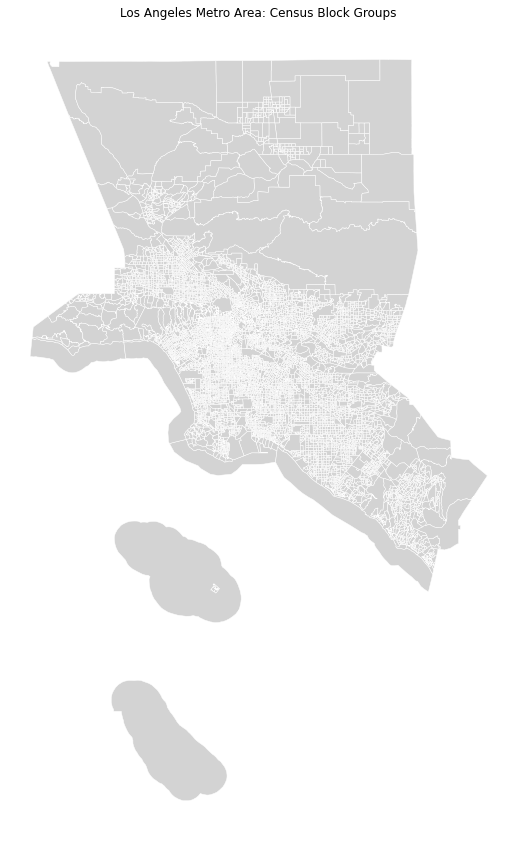

In [34]:
# Preview map
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

In [35]:
# simplify column name
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,cbg,State,County,ClassCode,geometry
0,06,037,310400,3,060373104003,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
1,06,059,086502,3,060590865023,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
2,06,037,651002,4,060376510024,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
3,06,037,651101,1,060376511011,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
4,06,059,099402,3,060590994023,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...,...
8243,06,037,603302,1,060376033021,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
8244,06,037,603302,2,060376033022,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
8245,06,037,603302,3,060376033023,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
8246,06,037,603400,1,060376034001,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


In [36]:
# set index for join
gdf = gdf.set_index('cbg')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry
cbg,,,,,,,,
060373104003,06,037,310400,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
060590865023,06,059,086502,3,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
060376510024,06,037,651002,4,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
060376511011,06,037,651101,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
060590994023,06,059,099402,3,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...
060376033021,06,037,603302,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
060376033022,06,037,603302,2,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
060376033023,06,037,603302,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."


In [37]:
gdf = gdf.merge(race_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,,,,,,,,,
060373104003,06,037,310400,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499...",1286,894,69.517885
060590865023,06,059,086502,3,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135...",2545,2172,85.343811
060376510024,06,037,651002,4,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277...",1285,546,42.490272
060376511011,06,037,651101,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400...",2708,1373,50.701625
060590994023,06,059,099402,3,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052...",672,259,38.541667
...,...,...,...,...,...,...,...,...,...,...,...
060376033021,06,037,603302,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043...",1098,392,35.701275
060376033022,06,037,603302,2,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086...",2053,446,21.724306
060376033023,06,037,603302,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134...",955,429,44.921466


In [38]:
gdf = gdf.merge(pov_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly,poverty_percentage
cbg,,,,,,,,,,,,
060373104003,06,037,310400,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499...",1286,894,69.517885,17.884914
060590865023,06,059,086502,3,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135...",2545,2172,85.343811,22.789784
060376510024,06,037,651002,4,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277...",1285,546,42.490272,0.000000
060376511011,06,037,651101,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400...",2708,1373,50.701625,7.745399
060590994023,06,059,099402,3,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052...",672,259,38.541667,12.969283
...,...,...,...,...,...,...,...,...,...,...,...,...
060376033021,06,037,603302,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043...",1098,392,35.701275,11.475410
060376033022,06,037,603302,2,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086...",2053,446,21.724306,20.691358
060376033023,06,037,603302,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134...",955,429,44.921466,13.015873


In [39]:
# Write filtered geojson file to disc
gdf.to_file(target/'la/la_census.geojson', driver='GeoJSON')

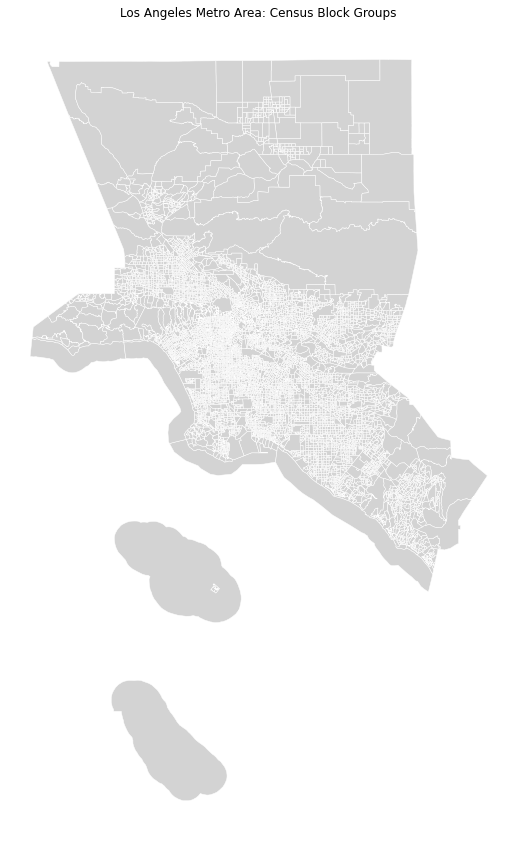

In [40]:
# Preview map
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

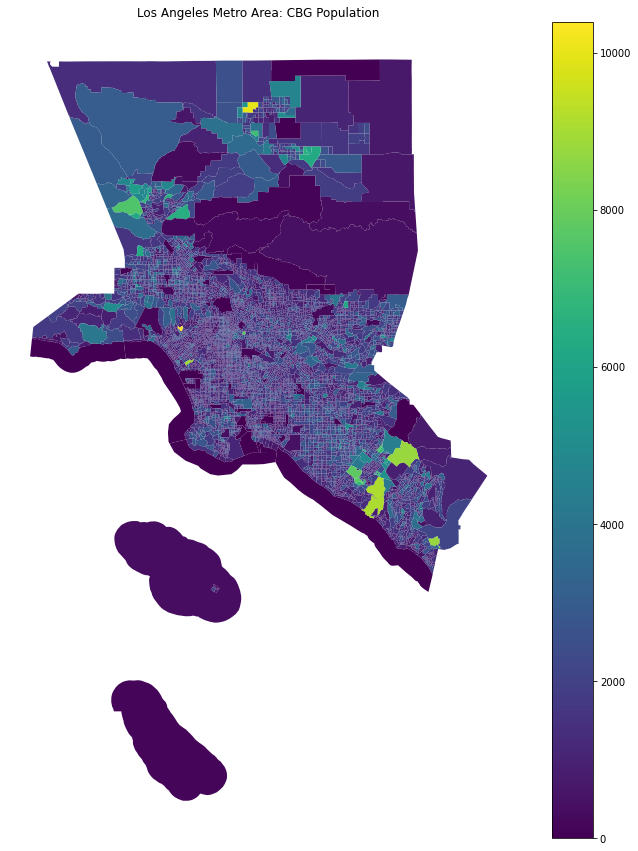

In [41]:
# Plot population size
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Population')
ax.axis('off')
gdf.plot(column='pop_total', ax=ax, legend=True);

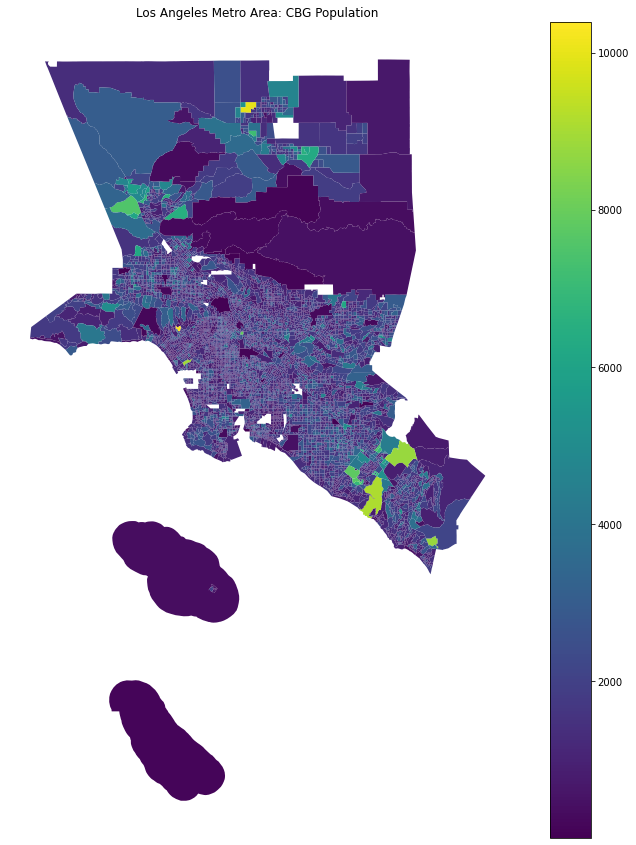

In [42]:
# Pop where not 0
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Population')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='pop_total', ax=ax, legend=True);

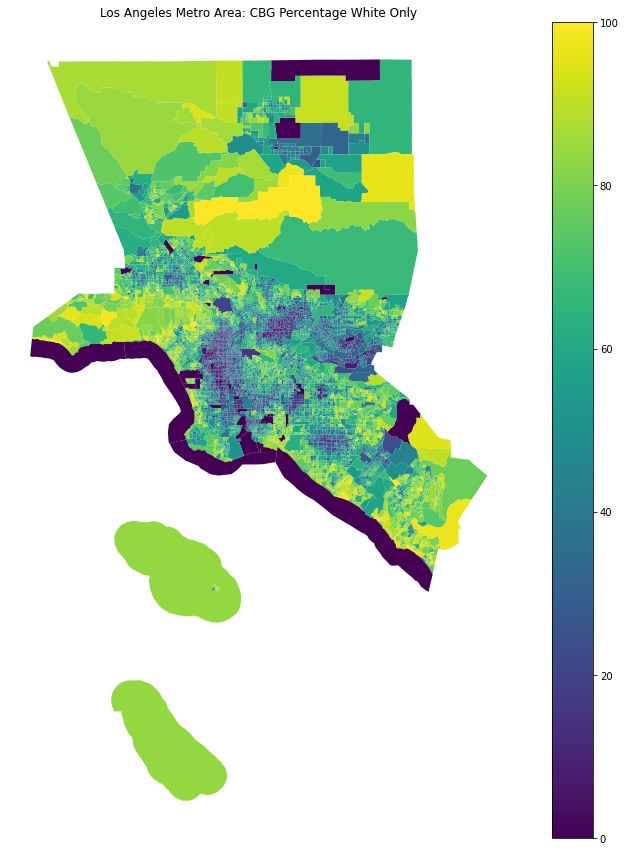

In [43]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf.plot(column='perc_whiteonly', ax=ax, legend=True);

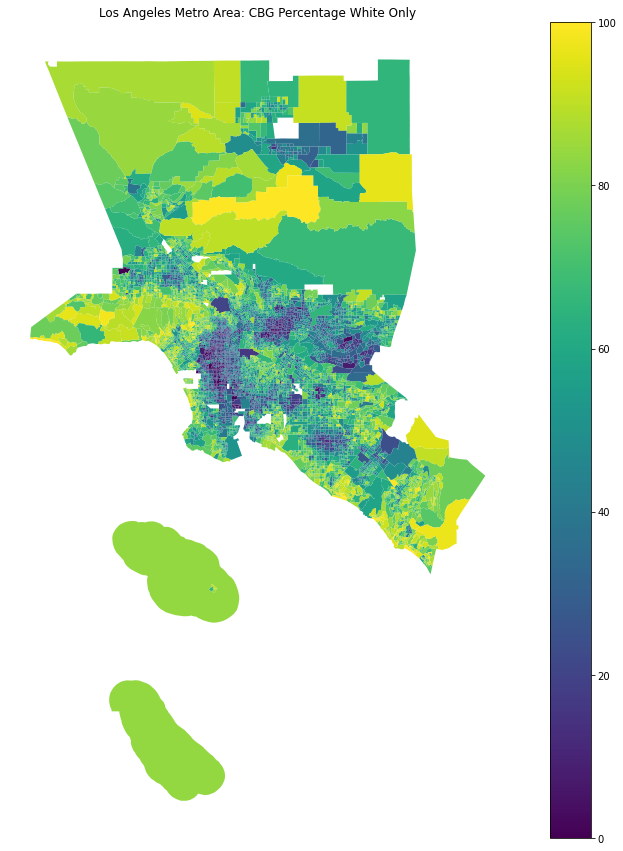

In [44]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='perc_whiteonly', ax=ax, legend=True);

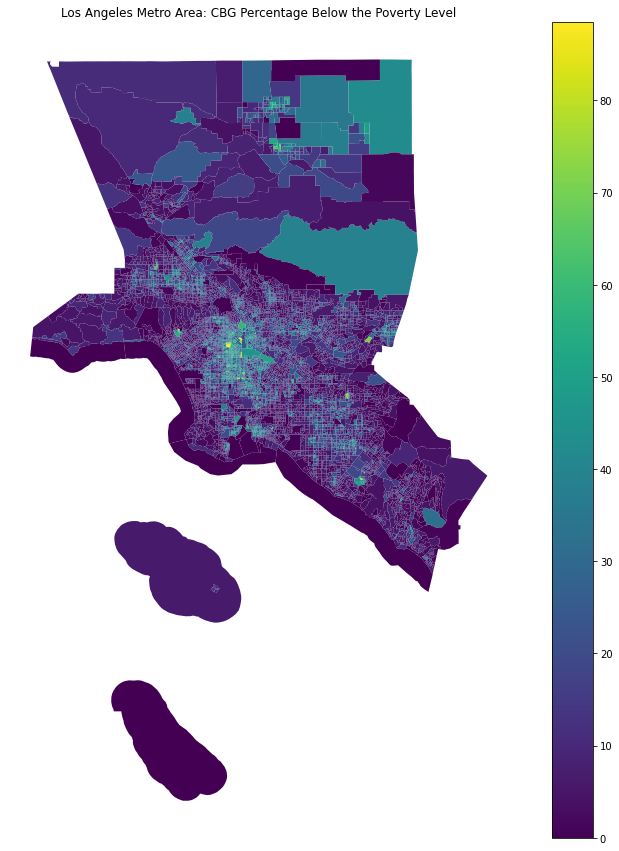

In [45]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf.plot(column='poverty_percentage', ax=ax, legend=True);

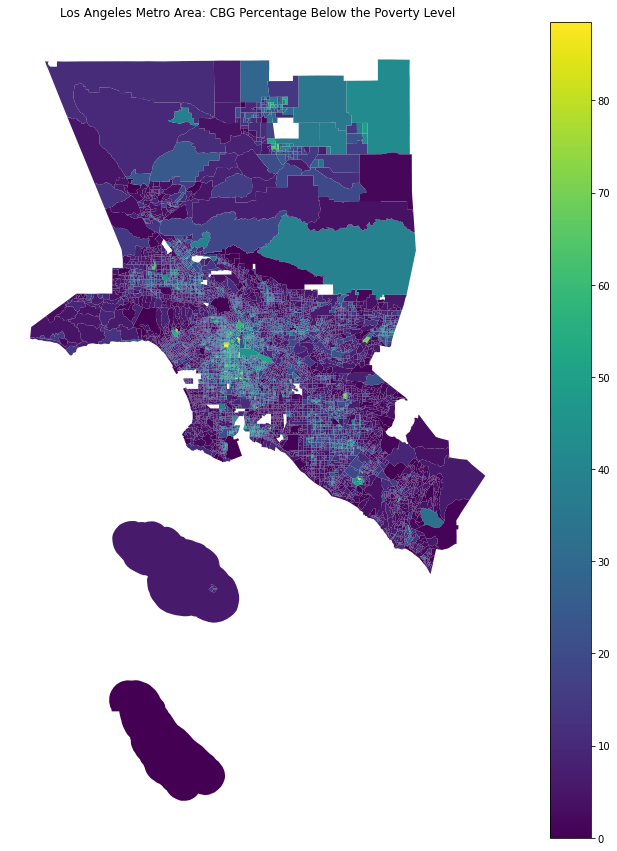

In [46]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='poverty_percentage', ax=ax, legend=True);

In [47]:
# Extract stats to save
stats_df = gdf[['pop_total','poverty_percentage','perc_whiteonly']]
stats_df

,pop_total,poverty_percentage,perc_whiteonly
cbg,,,
060373104003,1286,17.884914,69.517885
060590865023,2545,22.789784,85.343811
060376510024,1285,0.000000,42.490272
060376511011,2708,7.745399,50.701625
060590994023,672,12.969283,38.541667
...,...,...,...
060376033021,1098,11.475410,35.701275
060376033022,2053,20.691358,21.724306
060376033023,955,13.015873,44.921466


In [48]:
if len(set(stats_df.index)) == len(stats_df.index):
    print('Everything is good, every Row has a unique CBG!')
else:
    print('We have a problem, not every row uas a unique CBG.')

Everything is good, every Row has a unique CBG!


In [49]:
for col in stats_df.columns:
    print('\n')
    print(col)
    print('Min: {}\nMax: {}'.format(stats_df[col].min(), stats_df[col].max()))



pop_total
Min: 0
Max: 10384


poverty_percentage
Min: 0.0
Max: 88.46960167714884


perc_whiteonly
Min: 0.0
Max: 100.0


In [50]:
# Print all Null and NaN values
print('We have {} null values.'.format(len(stats_df[stats_df.isna().any(axis=1)])))

We have 0 null values.


In [51]:
# Write stats to disc
filename = target/'la/la.csv'
stats_df.to_csv(filename)